## Problema 12

#### Usando os dados do Problema 03:

##### (a) Construa a tabela de frequências conjuntas para as variáveis X (número de empregos nos últimos dois anos) e Y (salário mais recente).

In [1]:
import pandas as pd
import statistics as stat
import matplotlib.pyplot as plt
import math as math

In [2]:
df=pd.DataFrame(
    data={
        "X":[1,3,2,3,2,2,3,1,2,3,2,3,1,2,3,4,1,2,2,2,2,3,4,1,2,3,4,1,4,3,2,1,4,2,4,3,1,3,2,2],
        "Y":[6,2,4,1,4,1,3,5,2,2,5,2,6,6,2,2,5,5,1,1,4,2,1,5,4,2,1,5,4,3,2,1,1,6,2,1,4,2,3,5]
    },
    index=range(1,41)
)

In [3]:
mediana_x = stat.median(df['X'])
mediana_y = stat.median(df['Y'])

frequencias_conjuntas = {}
frequencias_conjuntas['x_alto_y_alto']=0
frequencias_conjuntas['x_alto_y_baixo']=0
frequencias_conjuntas['x_baixo_y_alto']=0
frequencias_conjuntas['x_baixo_y_baixo']=0

for index, row in df.iterrows():
    if row['X'] >= mediana_x:
        if row['Y'] >= mediana_y:
            frequencias_conjuntas['x_alto_y_alto']+=1
        else:
            frequencias_conjuntas['x_alto_y_baixo']+=1
    else:
        if row['Y'] >= mediana_y:
            frequencias_conjuntas['x_baixo_y_alto']+=1
        else:
            frequencias_conjuntas['x_baixo_y_baixo']+=1

df_frequencia_conjunta=pd.DataFrame(
    data = {
        "Y alto":[
            frequencias_conjuntas['x_alto_y_alto'],
            frequencias_conjuntas['x_baixo_y_alto'],
            frequencias_conjuntas['x_alto_y_alto']+frequencias_conjuntas['x_baixo_y_alto']
        ],
        "Y baixo":[
            frequencias_conjuntas['x_alto_y_baixo'],
            frequencias_conjuntas['x_baixo_y_baixo'],
            frequencias_conjuntas['x_alto_y_baixo']+frequencias_conjuntas['x_baixo_y_baixo']
        ],
        "Total":[
            frequencias_conjuntas['x_alto_y_alto']+frequencias_conjuntas['x_alto_y_baixo'],
            frequencias_conjuntas['x_baixo_y_alto']+frequencias_conjuntas['x_baixo_y_baixo'],
            len(df)
        ]
    },
    index=['X alto','X baixo','Total']
)
print('Distribuição de frequência conjunta:')
df_frequencia_conjunta

Distribuição de frequência conjunta:


,Y alto,Y baixo,Total
X alto,13,19,32
X baixo,7,1,8
Total,20,20,40


##### (b) Como poderia ser feito o gráfico de dispersão desses dados?

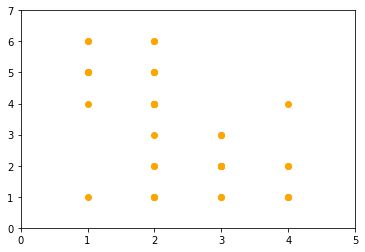

In [4]:
plt.scatter(df['X'], df['Y'], s=None, c='Orange')
plt.xlim((0, 5))
plt.ylim((0, 7))
plt.show()

##### (c) Calcule o coeficiente de correlação. Baseado nesse número você diria que existe dependência entre as duas variáveis?

In [5]:
numero_elementos = len(df)
media_X = stat.mean(df['X'])
media_Y = stat.mean(df['Y'])

covariancia = 0
for index, row in df.iterrows():
    covariancia += (row['X']-media_X)*(row['Y']-media_Y)
    
covariancia = covariancia/numero_elementos

desvio_padrao_X = stat.pstdev(df['X'])
desvio_padrao_Y = stat.pstdev(df['Y'])

correlacao = covariancia / (desvio_padrao_X*desvio_padrao_Y)
print('Coeficiênte de correlação:',correlacao)

Coeficiênte de correlação: -0.5922278299827967
